In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:
import warnings

warnings.filterwarnings("ignore")

I. Предобработка данных
=
## 1. Внешний вид (столбцы, дублирование)

In [3]:
df = pd.read_csv('/kaggle/input/medics-yandex/medics_1.csv', sep=',', skipinitialspace=True, decimal=',')
df.columns = [col.lower().replace(',', '').replace('.', '').replace(" ", '_') for col in df.columns]
df.head(7)

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,толщина_паренхимы_почек,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез
0,нет,Стадия C1-C2,67,1,1,1,1,1,0,0,...,14.0,0,1,150,0,0,200,830,2900,900
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,15.0,1,4,235,143,121,600,640,900,800
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,17.0,0,1,210,0,0,250,0,1800,500
3,нет,Стадия C1-C2,62,1,1,0,1,1,1,0,...,16.0,1,3,210,71,43,500,1283,1700,1700
4,есть,Стадия C1-C2,55,1,1,1,1,1,0,0,...,15.0,1,3,265,116,74,500,1560,1800,1300
5,нет,Пациенты без ХБП,60,1,1,0,1,1,0,1,...,19.0,1,3,240,74,62,200,1350,2100,1800
6,есть,Стадия C1-C2,65,1,1,1,1,0,0,0,...,15.0,1,3,185,94,59,500,600,400,2000


In [4]:
df.isna().sum()

развитие_опп             0
хбп                      0
возраст                  0
пол                      0
гб                       0
                        ..
время_пережатия_аорты    0
объем_кровопотерии       0
объем_гемотрансфузии     0
объем_инфузий            0
диурез                   0
Length: 67, dtype: int64

Названия колонок отформатированы, пропуски есть


## 2. Пропуски, выбросы

In [5]:
def graph_histplot_bin(dd, factor):  # Исследование количественных шкал, построение гистограммы и ящика с усами
    sns.set(style='white')
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    sns.histplot(dd[factor], bins=20, kde=True, ax=ax[0]) 
    sns.boxplot(data=dd, y=factor, ax=ax[1], color="pink")
    
    ax[0].axvline(np.mean(dd[factor]),color='r', linestyle='-', label='Среднее')
    ax[0].axvline(np.median(dd[factor]),color='b', linestyle='--', label='Медиана')
    
    ax[0].set_xlabel(factor.capitalize(), size=13)
    ax[0].set_ylabel('')
    ax[1].set_xlabel('')
    
    ax[0].legend(loc='center right')
    
    #plt.suptitle(f'Исследование данных на нормальность шкалы {factor}', size=12, y=1.01)
    plt.show()

***

In [6]:
df['сад'].unique()

array([ 13, 140, 130, 120, 150, 135, 125, 126, 115, 180, 160, 100, 170,
       133, 145, 187, 105, 142, 153, 110])

Является ли 13 адекватным значением? 

In [7]:
df['мочевина_'].unique()

array([ 8.2 ,  6.2 ,  5.5 ,  5.9 ,  5.3 ,  8.  ,  6.5 ,  5.  ,  7.7 ,
        7.  ,  6.6 ,  6.3 ,  7.6 ,  8.8 ,  8.1 ,  4.6 , 11.5 ,  8.7 ,
        6.4 ,  8.3 ,  5.8 ,  4.2 ,  3.3 ,  4.28,  5.7 ,  6.7 ,  7.1 ,
        5.2 ,  7.3 ,  6.9 ,  7.2 ,  7.5 ,  6.  ,  6.15,  9.8 ,  9.4 ,
        5.6 , 12.  , 10.  ,  4.5 ,  9.2 ,  4.1 , 18.  , 18.2 ,  9.  ,
        4.9 ,   nan,  4.8 , 10.4 ,  6.1 ,  6.8 ,  8.6 ,  5.1 ,  7.4 ,
       10.6 ,  9.3 ,  6.41, 12.3 , 11.1 ,  3.8 ,  7.8 ,  3.4 ,  4.3 ,
        8.9 ,  4.7 ,  5.05])

In [8]:
df['мочевина_'].isna().sum()

1

Всего один пропуск, скорее всего он случайный.

In [9]:
df[df['мочевина_'].isnull()]

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,толщина_паренхимы_почек,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез
93,нет,Пациенты без ХБП,53,1,0,0,1,1,1,0,...,15.0,1,2,200,95,44,500,920,1600,3200


___

In [10]:
df['хлориды'].unique()

array([100. ,   nan, 102. , 103. , 110.7, 100.5, 106. ,  99. , 105.7,
       104. , 109.8, 110. , 101. , 107.8, 107. ,  97. , 109. ,  98. ,
       115.1, 108.9, 108. , 114.4, 100.4, 109.7, 106.5, 102.8, 105. ,
       105.9, 102.4, 116.5, 115. , 104.6, 112. ,  99.8, 108.2, 108.3,
        96. ])

In [11]:
df['хлориды'].isna().sum()

23

В этой колонке уже много пропусков.

In [12]:
df[df['хлориды'].isnull()].head()

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,толщина_паренхимы_почек,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,15.0,1,4,235,143,121,600,640,900,800
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,17.0,0,1,210,0,0,250,0,1800,500
6,есть,Стадия C1-C2,65,1,1,1,1,0,0,0,...,15.0,1,3,185,94,59,500,600,400,2000
13,нет,Пациенты без ХБП,57,1,1,0,1,0,0,1,...,15.0,0,1,150,0,0,400,0,1400,250
44,есть,Пациенты без ХБП,52,1,1,0,1,0,1,0,...,15.0,1,2,345,167,134,700,602,1600,1000


Выявить возможную причину пропусков (???)

? хз думаю добавить бинарный фактор "Есть_пропуски", а сами пропуски пропробывать заменить значениями из дф, по одинаковым значениям возраст и развините опп 

In [13]:
df['кальций'].unique()

array([0.99, 1.02, 0.96, 0.94, 0.85, 1.12, 1.22, 1.2 , 0.82, 0.9 , 1.1 ,
        nan, 1.13, 0.88, 1.14, 1.24, 1.01, 1.  , 1.11, 1.16, 0.98, 0.86,
       0.78, 0.79, 2.33, 0.89, 0.83, 0.8 , 0.87, 1.06, 1.05, 1.15, 1.26,
       1.21, 1.07, 0.73, 1.04, 0.72, 1.08, 1.09, 1.03, 0.95, 0.84, 0.71,
       2.4 , 0.7 , 1.6 , 0.75, 1.44, 2.32, 0.93, 1.17])

In [14]:
df['кальций'].isna().sum()

19

Проверим сколько есть пациентов, с пропусками в факторах кальций и хлориды.

In [15]:
query = (df['хлориды'].isnull()) & (df['кальций'].isnull())
a =  df.loc[query]
a

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,толщина_паренхимы_почек,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез
13,нет,Пациенты без ХБП,57,1,1,0,1,0,0,1,...,15.0,0,1,150,0,0,400,0,1400,250
64,есть,Стадия C1-C2,54,1,1,0,1,1,0,0,...,14.0,0,1,245,0,0,250,0,1800,700
75,есть,Пациенты без ХБП,54,1,1,0,1,1,0,0,...,17.0,0,1,160,0,0,200,0,1700,1000
87,нет,Пациенты без ХБП,55,1,0,1,1,1,0,0,...,17.0,1,2,260,124,98,500,820,700,1400
93,нет,Пациенты без ХБП,53,1,0,0,1,1,1,0,...,15.0,1,2,200,95,44,500,920,1600,3200
104,есть,Пациенты без ХБП,46,0,0,0,1,1,0,0,...,10.0,1,2,170,67,44,500,1320,700,1700
173,есть,Стадия С3,60,1,1,0,1,1,0,0,...,12.0,1,3,230,79,58,500,1010,1750,3300
174,нет,Стадия C1-C2,40,1,1,0,1,0,0,0,...,16.0,0,1,170,0,0,250,0,1400,1000


In [16]:
for i in a.columns:
    if len(a[i].unique()) == 1:
        print(i, a[i].unique())

стенокардия [1]
а-в_блокада [0]
хлориды [nan]
кальций [nan]


У всех, у кого нет данных по хлоридам и кальцию есть заболевание стенокардия и не было проведена ав блокада.

> __Стенокардия__ – заболевание, обусловленное несоответствием между потребностью миокарда в кислороде и его доставкой, приводящее к нарушениям функций сердца.  
> __Атриовентрикулярная (АВ) блокада__ – частичное или полное прерывание проведения импульса от предсердий к желудочкам. Наиболее частой причиной является идиопатический фиброз или склероз проводящей системы сердца. Диагноз ставится на основании результатов электрокардиографии

***

In [17]:
df['рн'].unique()

array(['7,42', '7,49', '7,37', '7,44', '7,41', '8,35', '7,48', '7,43',
       '7,46', '7,55', '7,4', '7,45', '7,51', '7,47', '7,31', '7,39',
       '7,52', '7,34', '7,35', '7,38', '7,5', '2', '1.88', '2.01', '7,36'],
      dtype=object)

Изменим тип данных на правильный.

In [18]:
df['рн'] = df['рн'].str.replace(",", ".")
df = df.astype({'рн': float})

***
 'ве', 'нсо3', 'ро2', 'рсо2', 'оксигем.', 'общ.со2', 'гемоглобин',
       'лейкоциты_крови', 'тромбоциты', 'чсс', 'интервал_q-t', 'qrs', 'хсн',
       'нк', 'масса_миокарда_лж', 'фракция_изгнания', 'ар', 'давл._в_ла', 'уо',
       'мо', 'дд_лж_см', 'сд_лж_см', 'кдо_мл', 'ксо', 'кдр_правого_желудочка',
       'размер_левого_предсердия', 'алат', 'асат', 'холестерин',
       'триглицериды', 'лпонп', 'лпнп', 'общий_белок', 'ачтв', 'имт',
       'толщина_паренхимы_почек', 'аик', 'количество_шунтов',
       'длительность_операции', 'длительность_аик', 'время_пережатия_аорты',
       'объем_кровопотерии', 'объем_гемотрансфузии', 'объем_инфузий',
       'диурез'

In [19]:
df['оксигем'].unique()

array([ 99. ,  98.8,  96.6,  99.4,  99.6,  98. ,  98.5,  99.9,  99.2,
       146. ,  97.4,  99.3,  99.7,  98.7,  97.8,  98.9,  97.9,  99.8,
        98.3,  98.1,  98.6,  99.5,  97.3,  93.9,  96.7,  97.7,  97. ,
        97.5,  66. ,  95.7,  97.6,  98.2,  96. ,  97.1,  99.1,  94.8,
        95.3,  98.4,  96.9])

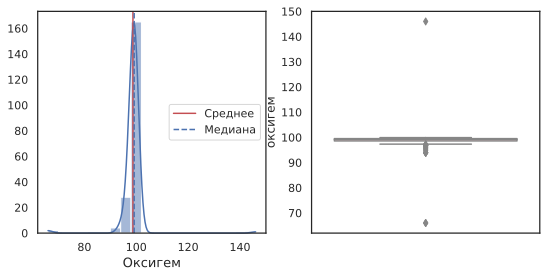

In [20]:
graph_histplot_bin(df, 'оксигем')

**Оксигем** - показатель крови, % (SaO2), проценты не могут быть > 100, изменим на медиану все значения, которые превышают 100

***

In [21]:
median = df[df['оксигем'] != 140]['оксигем'].median()

df['оксигем'] = df['оксигем'].apply(lambda x: median if x > 100 else x)

***

In [22]:
df['чсс'].unique()

array(['61', '66', '67', '94', '81', '74', '62', '83', '104', '88', '80',
       '91', '84', '77', '50', '119', '70', '79', '75', '68', '98', '73',
       '76', '60', '69', '57', '64', '1000', '58', '59', '7o', '65', '47',
       '54', '55', '56', '72', '41', '78', '46', '105', '82', '51', '52',
       '107', '115', '42', '93', '63', '44', '53', '49', '102'],
      dtype=object)

У фактора ЧСС неправильный тип данных из-за опечатки.

In [23]:
df['чсс'] = df['чсс'].replace('7o', '70')
df = df.astype({'чсс': np.int64})
df['чсс']

0      61
1      66
2      67
3      94
4      81
       ..
195    58
196    53
197    83
198    65
199    70
Name: чсс, Length: 200, dtype: int64

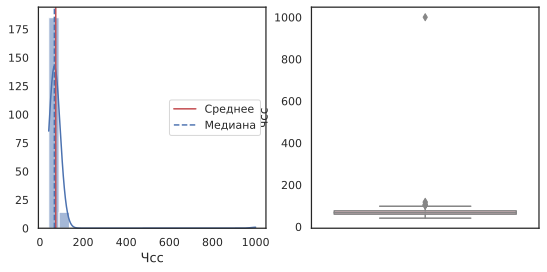

In [24]:
graph_histplot_bin(df, 'чсс')

Заменим на медиану аномальное значение 1000 ударов/минута.

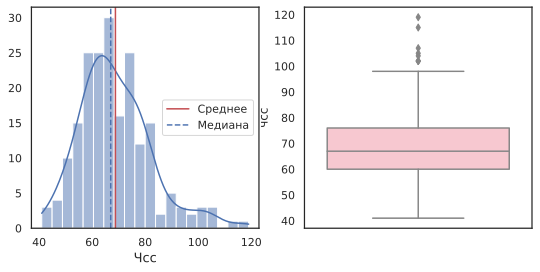

In [25]:
median = df[df['чсс'] != 1000]['чсс'].median()

df['чсс'] = df['чсс'].apply(lambda x: median if x == 1000 else x)

graph_histplot_bin(df, 'чсс')

***

In [26]:
df.columns

Index(['развитие_опп', 'хбп', 'возраст', 'пол', 'гб', 'сахарный_диабет',
       'стенокардия', 'инфаркт_миокарда', 'мерцательная_аритмия',
       'желудочковая_экстрасистолия', 'а-в_блокада',
       'блокада_ножек_пучка_гиса', 'сад', 'дад', 'креатинин_крови',
       'мочевина_', 'скф_расч', 'калий', 'натрий', 'хлориды', 'кальций', 'рн',
       'ве', 'нсо3', 'ро2', 'рсо2', 'оксигем', 'общсо2', 'гемоглобин',
       'лейкоциты_крови', 'тромбоциты', 'чсс', 'интервал_q-t', 'qrs', 'хсн',
       'нк', 'масса_миокарда_лж', 'фракция_изгнания', 'ар', 'давл_в_ла', 'уо',
       'мо', 'дд_лж_см', 'сд_лж_см', 'кдо_мл', 'ксо', 'кдр_правого_желудочка',
       'размер_левого_предсердия', 'алат', 'асат', 'холестерин',
       'триглицериды', 'лпонп', 'лпнп', 'общий_белок', 'ачтв', 'имт',
       'толщина_паренхимы_почек', 'аик', 'количество_шунтов',
       'длительность_операции', 'длительность_аик', 'время_пережатия_аорты',
       'объем_кровопотерии', 'объем_гемотрансфузии', 'объем_инфузий',
       'диу

***

In [27]:
df['мо'].unique()

array([ 6.78,  5.82,  4.26,  6.54,  4.98,  5.1 ,  5.22,  6.18,  5.86,
        5.52,  4.08,  5.34,  6.36,  4.62,  4.74,  5.94,  7.14,  5.28,
        6.12,  5.64,  3.18,  5.16,  8.1 ,  3.84,  7.74,  7.44,  4.86,
        8.58,  8.52,  7.56,  5.46,  4.38,  6.  ,  4.72,  4.68,  4.44,
        5.4 ,  4.2 ,  7.98,  5.76,  7.32,  6.96,  7.02,  6.42,  3.66,
        5.04,  3.96,  3.78,  4.5 ,  7.26,  6.06,  5.58,  4.56,  7.08,
        6.24,  2.34,  4.02,  9.18,  6.84,  8.04, 72.6 ,  6.3 ,  6.66,
        4.8 ])

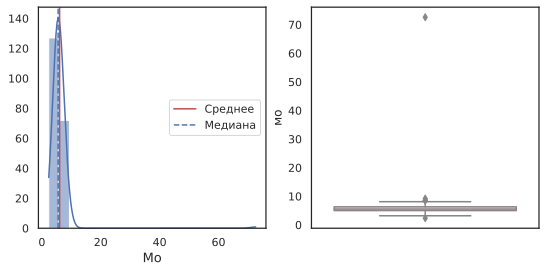

In [28]:
graph_histplot_bin(df, 'мо')

Для того чтобы проверить, является ли число 70 аномальным для минутного обьема сердца, рассмотрим данные о конкретном пациенте, с таким высоким показателем мо.

In [29]:
df.query("мо > 60")

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,толщина_паренхимы_почек,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез
167,есть,Пациенты без ХБП,73,1,1,1,1,1,0,1,...,19.0,1,2,200,83,34,450,1440,1500,800


[У минутного объема сердца (МО) есть формула, по которой она рассчитывается.](http://vmede.org/sait/?id=Gospitalnaya_ter_card_storojakova_2008_t1&menu=Gospitalnaya_ter_card_storojakova_2008_t1&page=6&ysclid=lura2nfw6d323379373) Перепроверим, может ли быть МО = 70, посчитав ее по этой формуле.
> "Минутный объем сердца (МО) вычисляют умножением УО на число сердечных сокращений"

In [30]:
mo = np.round((df.query("мо > 60")['уо'] * df.query("мо > 60")['чсс']) / 1000, 2) #тк уо в мл, а мо - в литрах
mo

167    7.38
dtype: float64

Таким образом, значение МО = 72.6 - выброс, заменим его вычисленным значением.

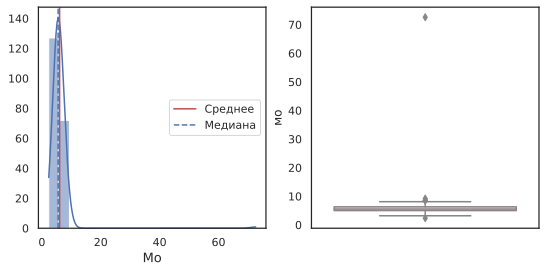

In [31]:
df['мо'] = df['мо'].apply(lambda x: mo if x == 7.38 else x)
graph_histplot_bin(df, 'мо')

В норме ВЕ +-2.5 ммоль/л. Отрицательное значение указывает на дефицит оснований и избыток кислот, положительное - избыток оснований и дефицит кислот.

***
### 3. Сформировать дополнительный столбец с данными по пациентам, прооперированным с использованием АИК, которым проводилось переливание крови


In [32]:
df['аик_с_гемотрансфузией'] = 0

df.loc[(df['аик'] == 1) & (df['объем_гемотрансфузии'] > 0), 'аик_с_гемотрансфузией'] = 1 

In [33]:
df

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,аик_с_гемотрансфузией
0,нет,Стадия C1-C2,67,1,1,1,1,1,0,0,...,0,1,150,0,0,200,830,2900,900,0
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,1,4,235,143,121,600,640,900,800,1
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,0,1,210,0,0,250,0,1800,500,0
3,нет,Стадия C1-C2,62,1,1,0,1,1,1,0,...,1,3,210,71,43,500,1283,1700,1700,1
4,есть,Стадия C1-C2,55,1,1,1,1,1,0,0,...,1,3,265,116,74,500,1560,1800,1300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,есть,Стадия C1-C2,69,1,1,1,1,1,0,0,...,1,2,170,76,32,500,925,1050,900,1
196,есть,Стадия C1-C2,68,1,1,0,1,0,1,0,...,0,2,220,0,0,150,0,1400,2000,0
197,есть,Стадия C1-C2,72,1,1,0,1,1,0,0,...,1,4,270,88,70,500,1379,1300,2300,1
198,нет,Стадия C1-C2,71,0,1,0,1,1,0,0,...,1,3,280,73,61,200,2360,900,2000,1


***
### 4. Провести аналитический и графический анализ данных

***
# II. Расчет, исследование

__Перечень задач__  
посчитать процент пациентов с хроническими заболеваниям
(сахарный диабет, гипертония, хроническая болезнь почек) для
групп “есть ОПП/нет ОПП”  

ввести новый фактор (описать и обосновать выбор фактора и
его значений) на основе столбца “Индекс массы тела”.

Посчитать количество пациентов, имеющих проблемы с
сердцем (выбор перечня проблем должен быть описан и
обоснован) для каждой группы. Сделать вывод.  

исследовать зависимость длительности операции от факта
перенесенного в прошлом инфаркта миокарда

верно ли, что у пациентов с ИМТ выше нормы будет
повышенный уровень холестерина?  

верно ли, что даже без хронических болезней почек с
возрастом толщина паренхимы почек уменьшается  

Проверить адекватность поставленного диагноза по стадии
хронической болезни почек (найти параметр, по которому
ставится диагноз, использовать данные из внешних источников)  

Исследовать корреляцию между параметрами. Для наиболее
сильных корреляций обосновать, имеет ли это реальный смысл
или же просто особенность данных


__Проверить адекватность поставленного диагноза по стадии
хронической болезни почек (найти параметр, по которому
ставится диагноз, использовать данные из внешних источников)__

Будем использовать параметр хбп

Пациентов с скф больше 100 считаем пациентами без хбп

Пациенты с скф в диапазоне 60-99 относим к 1 и 2 стадиям

Пациенты с скф в диапазоне 30-59 относим к 3 стадии

Пациентов с скф 15-29 относим к 4 стадии

Пациентов с скф меньше 15 относим к 5 стадии

In [36]:
bins = [0, 15, 30, 60, 100, 200]
labels = ["Стадия C5", "Стадия C4", "Стадия С3", "Стадия C1-C2", "Пациенты без ХБП"]

df["хбп_нов"] = pd.cut(df['скф_расч'], bins=bins, labels=labels)

In [37]:
df[df['хбп'] != df['хбп_нов']][['скф_расч', 'хбп', 'хбп_нов']]

,скф_расч,хбп,хбп_нов
5,75.0,Пациенты без ХБП,Стадия C1-C2
7,65.0,Пациенты без ХБП,Стадия C1-C2
12,86.0,Пациенты без ХБП,Стадия C1-C2
13,64.0,Пациенты без ХБП,Стадия C1-C2
19,82.0,Пациенты без ХБП,Стадия C1-C2
...,...,...,...
190,58.0,Пациенты без ХБП,Стадия С3
191,108.0,Стадия C1-C2,Пациенты без ХБП
193,133.0,Стадия C1-C2,Пациенты без ХБП
194,78.0,Пациенты без ХБП,Стадия C1-C2


Почти половина диагнозов выставлена некорректно. Заменяем хбп для дальнейшего использования

In [38]:
df['хбп'] = df['хбп_нов']
df.drop('хбп_нов', axis=1, inplace=True)

__Посчитать процент пациентов с хроническими заболеваниям (сахарный диабет, гипертония, хроническая болезнь почек) для групп “есть ОПП/нет ОПП”__

In [39]:
df2 = pd.concat([df, pd.get_dummies(df['хбп'])], axis=1)

In [41]:
grouped = df2.groupby('развитие_опп')[['сахарный_диабет', 'гб', 'Пациенты без ХБП', 'Стадия C1-C2', 'Стадия С3']].sum()
grouped.iloc[0] /= len(df2[df2['развитие_опп'] == 'есть'])
grouped.iloc[1] /= len(df2[df2['развитие_опп'] == 'нет'])

In [42]:
grouped

,сахарный_диабет,гб,Пациенты без ХБП,Стадия C1-C2,Стадия С3
развитие_опп,,,,,
есть,0.344000,0.872000,0.240000,0.632000,0.128000
нет,0.306667,0.906667,0.186667,0.746667,0.066667


__Ввести новый фактор (описать и обосновать выбор фактора и его значений) на основе столбца “Индекс массы тела”.__

Индекс массы тела — величина, позволяющая оценить степень соответствия массы человека и его роста 
и тем самым косвенно судить о том, является ли масса недостаточной, нормальной или избыточной. 
Важен при определении показаний для необходимости лечения. Используем его, чтобы распределить людей в группы по их весу


16 и менее Выраженный дефицит массы тела

16—18,5 Недостаточная (дефицит) масса тела

18,5—25 Норма

25—30 Избыточная масса тела (предожирение)

30—35 Ожирение 1 степени

35—40 Ожирение 2 степени

40 и более Ожирение 3 степени

Выбор фактора обоснован тем, что у людей в разных весовых категориях разное состояние здоровья. Выбор значений обоснован тем, что удобнее всего распределить людей на 3 группы: с пониженным, нормальным и повышенным весом. Граничные значения взяты из интернета

In [84]:
bins = [0, 18.5, 25, 100]
labels = ["Ниже нормы", "Нормальный вес", "Выше нормы"]

df["весовая_категория"] = pd.cut(df["имт"], bins=bins, labels=labels)

In [44]:
df[['имт', 'весовая_категория']]

,имт,весовая_категория
0,30.0,Выше нормы
1,29.0,Выше нормы
2,30.0,Выше нормы
3,30.0,Выше нормы
4,33.0,Выше нормы
...,...,...
195,27.0,Выше нормы
196,29.0,Выше нормы
197,24.0,Нормальный вес
198,33.0,Выше нормы


__Посчитать количество пациентов, имеющих проблемы с
сердцем (выбор перечня проблем должен быть описан и
обоснован) для каждой группы. Сделать вывод.__

О проблемах с сердцем говорят следующий колонки:

Стенокардия - состояние боли в груди из-за недостаточного кровоснабжения сердца

Инфаркт миокарда - гибель части сердечной мышцы

Мерцательная аритмия - нарушение сердечного ритма

Желудочная экстрасистолия - аномальное сердцебиение, которое может привести к остановке сердца

А-в блокада - состояние, при котором электрические импульсы, идущие от предсердий к желудочкам, замедляются или блокируются

Блокада ножек пучка Гиса - нарушение проводимости электрических импульсов в сердце

In [45]:
weight_grouped = df.groupby('весовая_категория')[['стенокардия', 'инфаркт_миокарда',
                                                  'мерцательная_аритмия', 'желудочковая_экстрасистолия',
                                                  'а-в_блокада', 'блокада_ножек_пучка_гиса']].sum() 
                                                  # можно использовать sum так как принимаемые значения это 1 и 0

weight_grouped

,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,а-в_блокада,блокада_ножек_пучка_гиса
весовая_категория,,,,,,
Ниже нормы,0,0,0,0,0,0
Нормальный вес,36,28,9,4,1,4
Выше нормы,156,104,42,25,17,28


Вывод: у пациентов с весом выше нормы проблем с сердцем больше, чем у любых других. Однако, в самих записях таких пациентов больше. Для того чтобы учесть это, посчитаем сколько в среднем заболеваний у одного человека для групп с нормальным и повышенным весом. Нужно заметить, что в датасете не было людей с пониженным весом, поэтому мы не можем сделать вывод о этой группе людей

Для нормального веса:

(36 + 28 + 9 + 4 + 1 + 4) / 40 = 2.05 заболевания на человека в среднем

Для повышенного веса: 

(156 + 104 + 42 + 25 + 17 + 28) / 160 = 2.325 заболевания на человека

Можно предположить, что у людей с повышенной массой тела чаще пробелемы с сердцем. Также то, что у нас в датасете людей с повышенной массой тела в 4 раза больше чем здоровых, может указывать на то, что у таких людей чаще возникает опп и/или их чаще оперируют


Давайте также посмотрим на проценты людей с конкретными проблемами в группах

In [47]:
weight_grouped.iloc[1] /= 40
weight_grouped.iloc[2] /= 160

In [48]:
weight_grouped

,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,а-в_блокада,блокада_ножек_пучка_гиса
весовая_категория,,,,,,
Ниже нормы,0.000,0.00,0.0000,0.00000,0.00000,0.000
Нормальный вес,0.900,0.70,0.2250,0.10000,0.02500,0.100
Выше нормы,0.975,0.65,0.2625,0.15625,0.10625,0.175


Люди с весом выше нормы чаще встречаются со стенокардией, мерцательной аритмией, желудочковой экстрасистолией, а-в блокадой и блокадой ножек пучка гиса

In [49]:
df['весовая_категория'].value_counts()

весовая_категория
Выше нормы        160
Нормальный вес     40
Ниже нормы          0
Name: count, dtype: int64

__Исследовать зависимость длительности операции от факта
перенесенного в прошлом инфаркта миокарда__

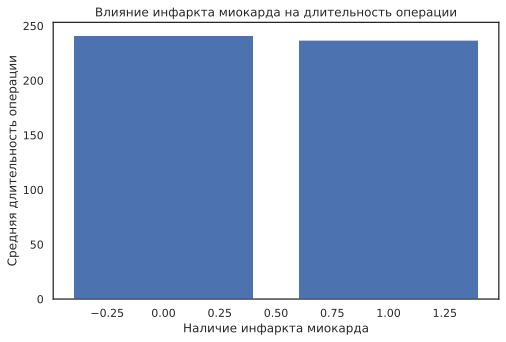

In [50]:
grouped = df.groupby('инфаркт_миокарда')['длительность_операции'].mean()

plt.bar(range(len(grouped)), grouped, align='center')

plt.xlabel('Наличие инфаркта миокарда')
plt.ylabel('Средняя длительность операции')

plt.title('Влияние инфаркта миокарда на длительность операции')

plt.show()

In [51]:
grouped

инфаркт_миокарда
0    241.132353
1    236.954545
Name: длительность_операции, dtype: float64

Длительность операции не зависит от перенесённого в прошлом инфаркта миокарда

__Исследуем зависимость уровня холестерина от ИМТ__

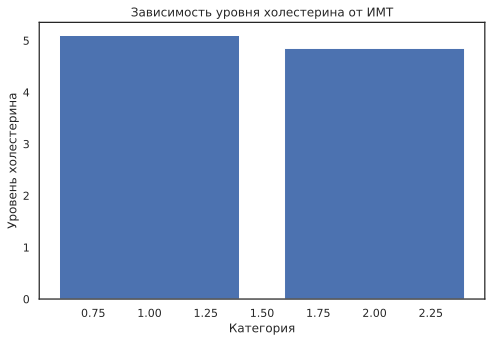

In [52]:
grouped = df.groupby('весовая_категория')['холестерин'].mean()

plt.bar(range(len(grouped)), grouped, align='center')

plt.xlabel('Категория')
plt.ylabel('Уровень холестерина')

plt.title('Зависимость уровня холестерина от ИМТ')

plt.show()

In [53]:
grouped

весовая_категория
Ниже нормы            NaN
Нормальный вес    5.09600
Выше нормы        4.84625
Name: холестерин, dtype: float64

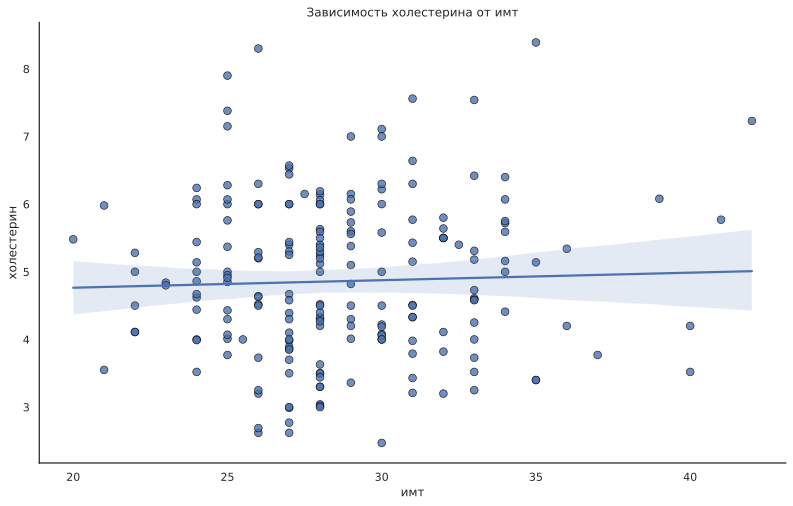

In [54]:
sns.set_style("white")
gridobj = sns.lmplot(x="имт", y="холестерин", data=df, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

plt.xlabel('имт')
plt.ylabel('холестерин')

plt.title('Зависимость холестерина от имт')

plt.show()

Исходя из наших данных нельзя сказать, что ИМТ влияет на уровень холестерина. Данный вывод не соответствует общеизвестной информации о популяции, скорее всего это обусловлено маленьким датасетом и тем, что мы рассматриваем нездоровых людей

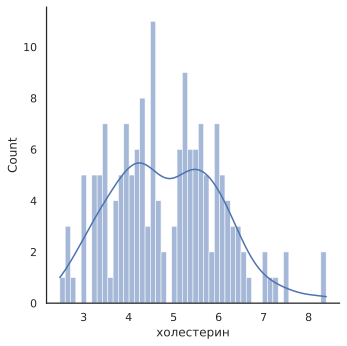

In [55]:
import seaborn as sns
sns.displot(df[df['весовая_категория']=='Выше нормы']['холестерин'], kde=True, bins=50)

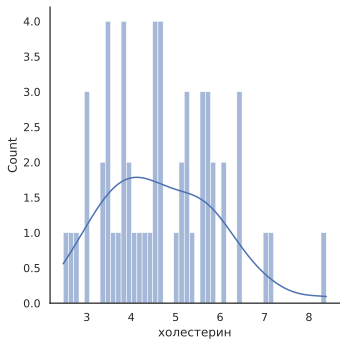

In [56]:
import seaborn as sns
sns.displot(df[df['весовая_категория']=='Выше нормы'][df['сахарный_диабет']==1]['холестерин'], kde=True, bins=50)

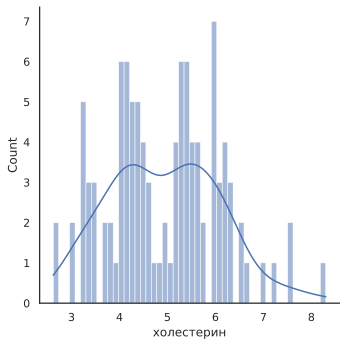

In [57]:
import seaborn as sns
sns.displot(df[df['весовая_категория']=='Выше нормы'][df['сахарный_диабет']==0]['холестерин'], kde=True, bins=50)

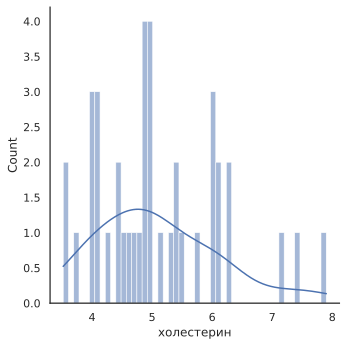

In [58]:
import seaborn as sns
sns.displot(df[df['весовая_категория']=='Нормальный вес']['холестерин'], kde=True, bins=50)

Посмотрев на распределение, заметим что у людей с повышенной массой тела наблюдяются "падение" в районе холестерина равного 5, и есть повышения на значениях 4 и 6. У распределения людей с нормальной массой тела такого не наблюдается. Это интересная особенность данных. 

Мы также посмотрели на распределение людей с повышенной массой тела с сахарным диабетом и без, такое "падение" наблюдается только у людей с сахарным диабетом. 

__Верно ли, что даже без хронических болезней почек с
возрастом толщина паренхимы почек уменьшается?__

In [59]:
df2 = df2[df2['хбп'] == 'Пациенты без ХБП']

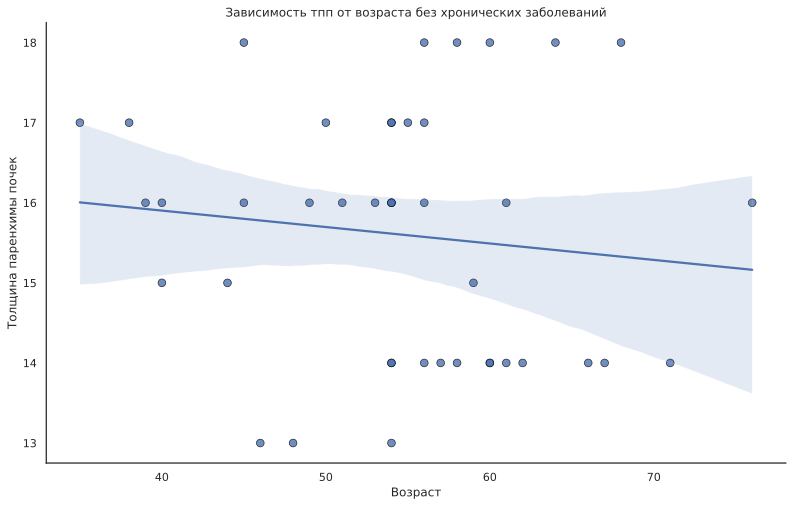

In [60]:
sns.set_style("white")
gridobj = sns.lmplot(x="возраст", y="толщина_паренхимы_почек", data=df2, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

plt.xlabel('Возраст')
plt.ylabel('Толщина паренхимы почек')

plt.title('Зависимость тпп от возраста без хронических заболеваний')

plt.show()

Да, это верно

__Исследуем корелляции__


In [90]:
df_for_corr = df.copy()

# используем one_hot_encoding

df_for_corr['развитие_опп'] = df_for_corr['развитие_опп'].replace({'есть': 1, 'нет': 0})
df_for_corr = pd.get_dummies(df_for_corr)

In [91]:
correlation_matrix = df_for_corr.corr()

threshold = 0.74

# Создаем маску для отбора значений, где абсолютное значение корреляции выше порога
mask = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)

# Применяем маску к матрице корреляции для исключения строк с низкой корреляцией
correlation_matrix = correlation_matrix.loc[mask.any(axis=1), mask.any(axis=0)]

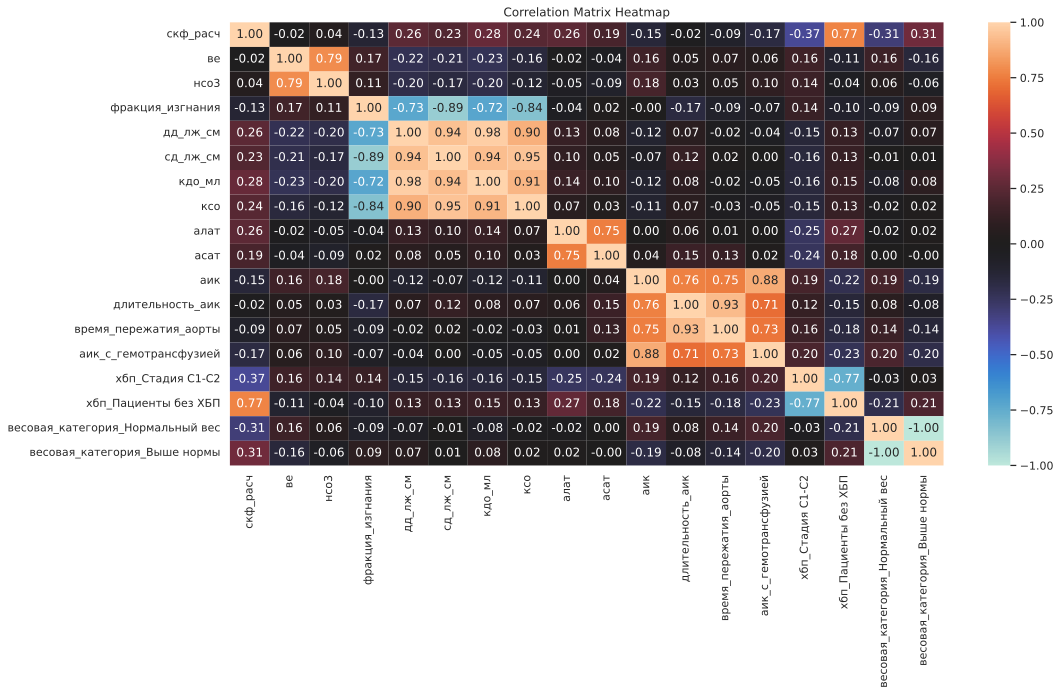

In [92]:
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='icefire', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Высокая корелляция наблюдается между:

ве и нсо3

фракцией изгнания и дд_лж_см, сд_лж_см, кдо_мл, ксо

дд_лж_см и сд_лж_см, кдо_мл, ксо

сд_лж_см и кдо_мл, ксо

кдо_мл и ксо

асат и алат

аик и длительность_аик, время_пережатия_аорты, аик_с_гемотрансфузией

длительность аик и время_пережатия_аорты, аик_с_гемотрансфузией

время_пережатия_аорты и аик_с_гемотрансфузией

диагнозами хбп

весовыми категориями

скф_расч и пациенты_без_хбп

Природа корреляции между ве и нсо3 зависит от множества факторов, включая специфическую патологию и общее состояние пациента.

Фракция изгнания (ФИ), которая оценивает, сколько крови выталкивается из сердца за каждое сокращение, может быть связана с параметрами, такими как диаметр левого желудочка в систолу (дд_лж_см) и его систолическая функция (сд_лж_см), которые отражают размер и работу сердца. Также, ФИ может коррелировать с кардиоваскулярным дебитом (КДО_мл) и кардиальным выбросом (КСО), которые оценивают, насколько эффективно сердце перекачивает кровь. Корелляция между всеми этими параметрами объясняется тем, что они описывают работу сердца

Корреляция между уровнями аспартатаминотрансферазы (АСАТ) и аланинаминотрансферазы (АЛАТ) в крови обычно обусловлена их схожими путями метаболизма в организме. Обе эти ферменты активно участвуют в обмене аминокислот

Корелляция между аик-колонками и временем пережатия аорты объясняется тем, что во время работы аик необходимо временно пережать аорту, чтобы хирург мог безопасно работать

Корелляция между диагнозами хбп объясняется тем, что когда 1 диагноз отмечен единицей, все остальные отмечены нулями. Также объясняется корелляция весовых категорий

Корелляция между параметрами аик объясняется очевидно, так как там все колонки так или иначе указывают на факт работы аик, а когда аик не работал, то все они принимают нулевые значения

Корелляция между скф_расч и пациенты_без_хбп объясняется тем, что диагноз ставится основываясь на скф